Examining Factors Responsible for Heart Attacks

Data Analysis is the process of creating a story using the data for easy and effective communication. It mostly utilizes visualization methods like plots, charts, and tables to convey what the data holds beyond the formal modeling or hypothesis testing task.

Domain: Healthcare

Cardiovascular diseases are the leading cause of death globally. To identify the causes and to develop a system to predict heart attack in an effective manner is necessary. The presented data has all the information about all the relevant factors that might have an impact on heart health. The data needs to be explained in detail for any further analysis.

Objective:
The objective was to create a model that would correctly classify patients with a high risk of heart attack

Perform preliminary data inspection and report the findings as the structure of the data, missing values, duplicates, etc.

In [1]:
## Data Analysis and Wrangling
import pandas as pd
import numpy as np

## Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Standardization and Classification
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix

In [2]:
## Reading data
df_vardesc=pd.read_excel("C:/Users/nawin/variable_description1.xlsx")
df_vardesc.head(14)

,variable,description
0,age,age in years
1,sex,(1 = male; 0 = female)
2,cp,chest pain type
3,trestbps,resting blood pressure (in mm Hg on admission...
4,chol,serum cholestoral in mg/dl
5,fbs,(fasting blood sugar > 120 mg/dl) (1 = true; ...
6,restecg,resting electrocardiographic results
7,thalach,maximum heart rate achieved
8,exang,exercise induced angina (1 = yes; 0 = no)
9,oldpeak,ST depression induced by exercise relative to...


In [3]:
## Reading data
df_hea=pd.read_excel("C:/Users/nawin/data_heart.xlsx")
df_hea.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# Printing Variables names
print("The number of rows and columns are:",df_hea.shape)
print("The name of columns in dataset are :",df_hea.columns)

The number of rows and columns are: (303, 14)
The name of columns in dataset are : Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [5]:
# Printing Variables names
print("The number of rows and columns are:",df_vardesc.shape)
print("The name of columns in dataset are :",df_vardesc.columns)

The number of rows and columns are: (14, 2)
The name of columns in dataset are : Index(['variable', 'description'], dtype='object')


In [6]:
# Structure of data
print("The structure of dataframe of Country-code is:\n",str(df_hea))

The structure of dataframe of Country-code is:
      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0       

Based on the findings from the previous question, remove duplicates (if any) and treat missing values using an appropriate strategy.

In [7]:
# Missing values
df_hea.isnull().sum()
## no missing value in  dataset

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df_hea.info()
# no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
## Checking duplicated values
df_hea[df_hea.duplicated()]

## one row duplicate value

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [10]:
# Dropping duplicate values
df_heart = df_hea.drop_duplicates()

In [11]:
## Rechecking duplicated values
df_heart[df_heart.duplicated()]

## No duplicate value

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


Get a preliminary statistical summary of the data. Explore the measures of central tendencies and the spread of the data overall.

In [12]:
print("The Basic Statistical Summary:\n",df_hea.describe().T)

The Basic Statistical Summary:
           count        mean        std    min    25%    50%    75%    max
age       303.0   54.366337   9.082101   29.0   47.5   55.0   61.0   77.0
sex       303.0    0.683168   0.466011    0.0    0.0    1.0    1.0    1.0
cp        303.0    0.966997   1.032052    0.0    0.0    1.0    2.0    3.0
trestbps  303.0  131.623762  17.538143   94.0  120.0  130.0  140.0  200.0
chol      303.0  246.264026  51.830751  126.0  211.0  240.0  274.5  564.0
fbs       303.0    0.148515   0.356198    0.0    0.0    0.0    0.0    1.0
restecg   303.0    0.528053   0.525860    0.0    0.0    1.0    1.0    2.0
thalach   303.0  149.646865  22.905161   71.0  133.5  153.0  166.0  202.0
exang     303.0    0.326733   0.469794    0.0    0.0    0.0    1.0    1.0
oldpeak   303.0    1.039604   1.161075    0.0    0.0    0.8    1.6    6.2
slope     303.0    1.399340   0.616226    0.0    1.0    1.0    2.0    2.0
ca        303.0    0.729373   1.022606    0.0    0.0    0.0    1.0    4.0
thal  

Identify the data variables which might be categorical in nature. Describe and explore these variables using appropriate tools. For example: count plot.

In [13]:
## Checking datatypes
df_heart.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [14]:
# Conversion of datatypes of sex, cp, fbs, restecg,exang,  thal, target
df_heart['sex'] = df_heart['sex'].astype('string')
df_heart['cp'] = df_heart['cp'].astype('string')
df_heart['fbs'] = df_heart['fbs'].astype('string')
df_heart['thal'] = df_heart['thal'].astype('string')
df_heart['exang'] = df_heart['exang'].astype('string')
df_heart['restecg'] = df_heart['restecg'].astype('string')
df_heart['target'] = df_heart['target'].astype('string')

In [15]:
## Checking datatypes
df_heart.dtypes

age           int64
sex          string
cp           string
trestbps      int64
chol          int64
fbs          string
restecg      string
thalach       int64
exang        string
oldpeak     float64
slope         int64
ca            int64
thal         string
target       string
dtype: object

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'trestbps'}>,
        <AxesSubplot:title={'center':'chol'}>],
       [<AxesSubplot:title={'center':'thalach'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>],
       [<AxesSubplot:title={'center':'ca'}>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

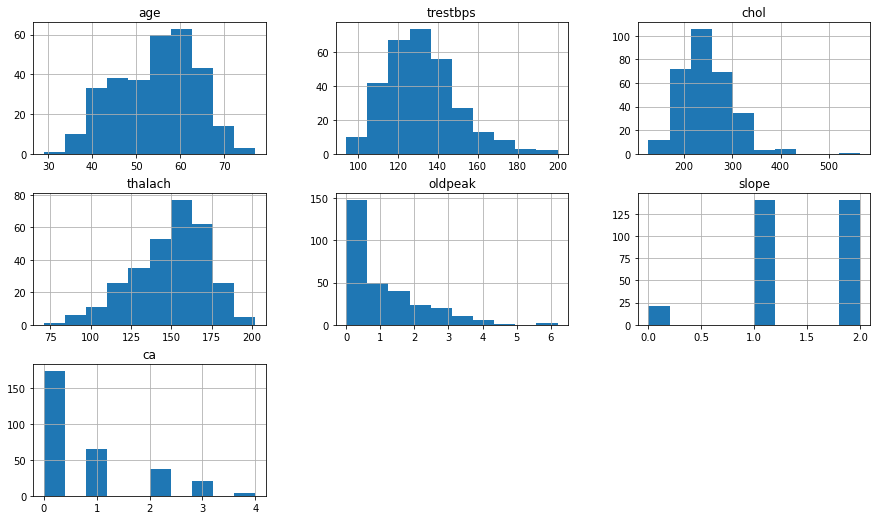

In [16]:
df_heart.hist(figsize=(15,15),layout=(5,3))
# Observation
# ca , age is left skewed
# trestbps,oldpeak ,chol are right skewed

In [17]:
# count of patients by gender
df_heart["sex"].value_counts()
# There are 206 males and 96 females

1    206
0     96
Name: sex, dtype: Int64

In [18]:
df_heart["target"].value_counts()
# Heart disease (0 = no, 1 = yes)
# There are 164 persons reported heart disease
# There are 138 persons reported no heart disease

1    164
0    138
Name: target, dtype: Int64

<AxesSubplot:xlabel='target', ylabel='count'>

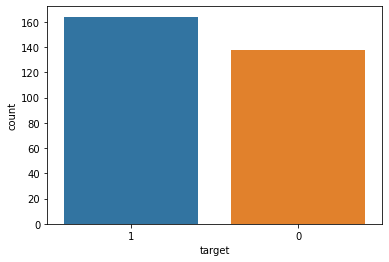

In [19]:
# count plot on single categorical variable "target"
sns.countplot(x ='target', data = df_heart)
# its a balanced dataset

In [20]:
df_heart["cp"].value_counts()
# Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic

0    143
2     86
1     50
3     23
Name: cp, dtype: Int64

<AxesSubplot:xlabel='cp', ylabel='count'>

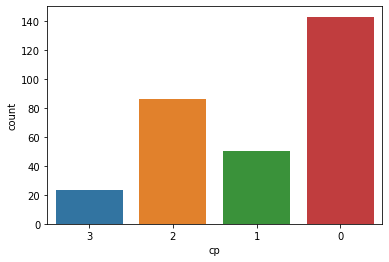

In [21]:
# count plot on single categorical variable 'cp'
sns.countplot(x ='cp', data = df_heart)

In [22]:
df_heart["exang"].value_counts()
# Exercise-induced angina (1 = yes; 0 = no)

0    203
1     99
Name: exang, dtype: Int64

<AxesSubplot:xlabel='exang', ylabel='count'>

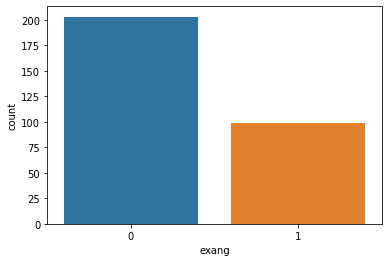

In [23]:
# count plot on single categorical variable 'exang'
sns.countplot(x ='exang', data = df_heart)

In [24]:
df_heart["restecg"].value_counts()
# Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes’ criteria

1    151
0    147
2      4
Name: restecg, dtype: Int64

<AxesSubplot:xlabel='restecg', ylabel='count'>

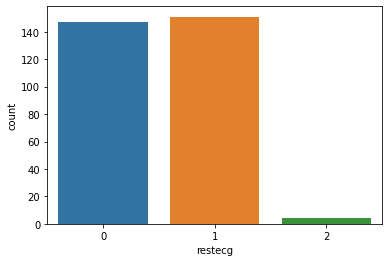

In [25]:
# count plot on single categorical variable 'restecg'
sns.countplot(x ='restecg', data = df_heart)

In [26]:
df_heart["fbs"].value_counts()
# The person’s fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

0    257
1     45
Name: fbs, dtype: Int64

<AxesSubplot:xlabel='fbs', ylabel='count'>

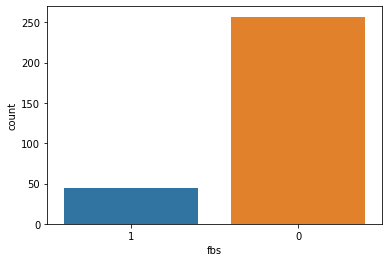

In [27]:
# count plot on single categorical variable 'fbs'
sns.countplot(x ='fbs', data = df_heart)

age            AxesSubplot(0.125,0.749828;0.227941x0.130172)
trestbps    AxesSubplot(0.398529,0.749828;0.227941x0.130172)
chol        AxesSubplot(0.672059,0.749828;0.227941x0.130172)
thalach        AxesSubplot(0.125,0.593621;0.227941x0.130172)
oldpeak     AxesSubplot(0.398529,0.593621;0.227941x0.130172)
slope       AxesSubplot(0.672059,0.593621;0.227941x0.130172)
ca             AxesSubplot(0.125,0.437414;0.227941x0.130172)
dtype: object

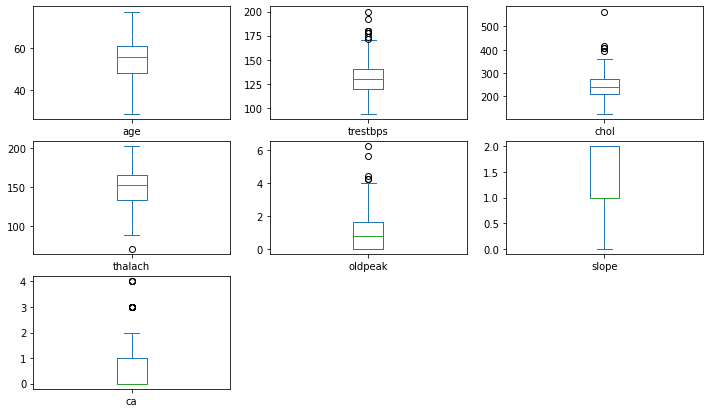

In [28]:
df_heart.plot(kind='box',subplots=True, layout=(5,3),figsize=(12,12))
# Observation:
# No outliers in age, slope, thalach
# Upper outliers in trestbps,chol,ca,oldpeak

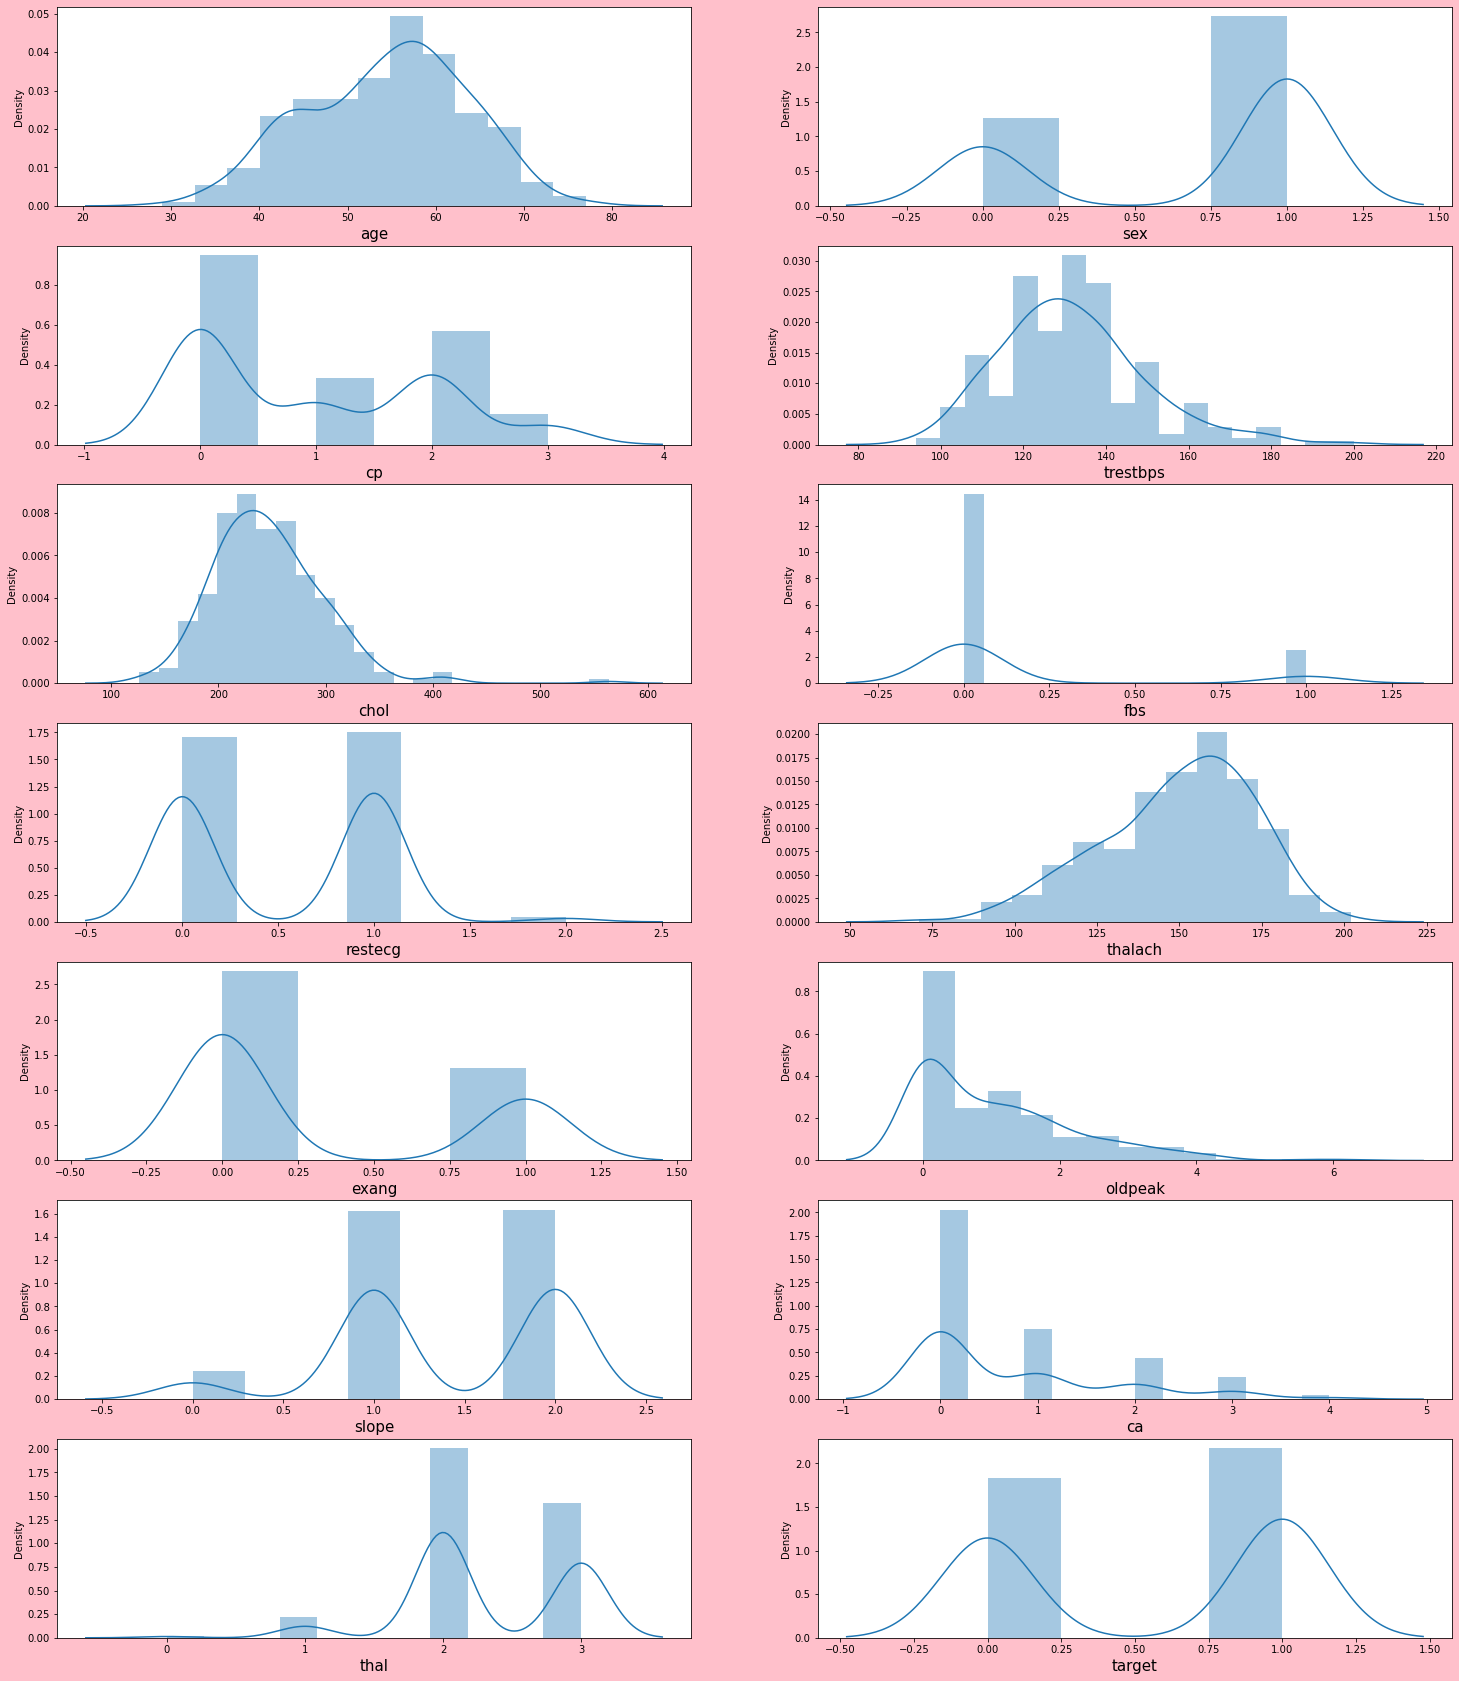

In [29]:
## Distribution of data
plt.figure(figsize=(25,30),facecolor='pink')
columnnumber=1

for column in df_heart:
    if columnnumber<=14:
        ax=plt.subplot(7,2,columnnumber)
        sns.distplot(df_heart[column])
        plt.xlabel(column,fontsize=15)
    columnnumber+=1
plt.show()

Study the occurrence of CVD across different ages.

In [30]:
# Distribution of heart disease/No heart disease by ages
tab2 =pd.crosstab(df_heart['age'],df_heart['target'])
tab2

target,0,1
age,,
29,0,1
34,0,2
35,2,2
37,0,2
38,1,1
39,1,3
40,2,1
41,1,9
42,1,7


<AxesSubplot:xlabel='age'>

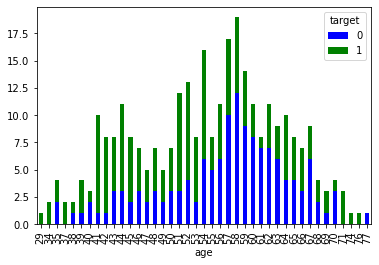

In [31]:
# Stacked plot for Distribution of heart disease/No heart disease by ages
tab2.plot(kind='bar', stacked='True',  color=['blue','green'],grid=False)

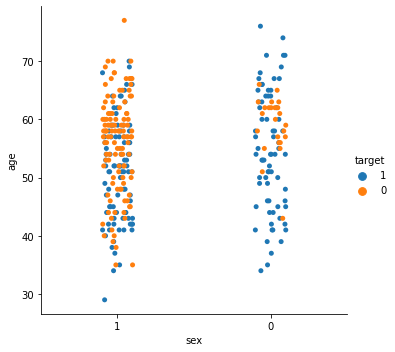

In [32]:
sns.catplot(data=df_heart, x='sex', y='age', hue='target')

Can we detect heart attack based on anomalies in resting blood pressure of the patient?

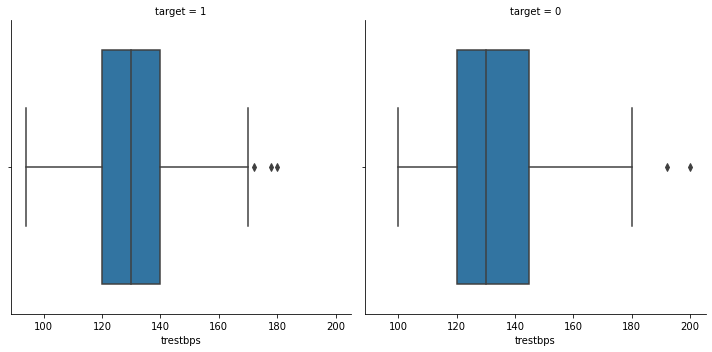

In [33]:
# A boxplot of the resting blood pressure of patients in categories
sns.factorplot(x = 'trestbps', data = df_heart, col = 'target', kind = 'box')

<AxesSubplot:xlabel='trestbps', ylabel='count'>

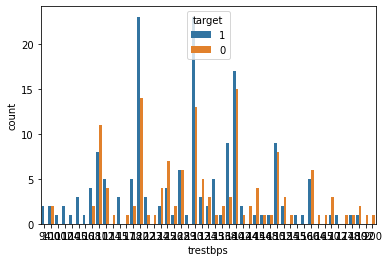

In [34]:
sns.countplot(x ='trestbps',hue='target', data = df_heart)

Study the composition of overall patients w.r.t . gender.

In [35]:
# Distribution of heart disease/No heart disease by gender
tab1 =pd.crosstab(df_heart['sex'],df_heart['target'])
tab1
# Heart disease (0 = no, 1 = yes)
# There are 24 females with no Heart Disease
# There are 72 females with Heart Disease
# There are 92 males with Heart Disease
# There are 114 males with no Heart Disease

target,0,1
sex,,
0,24,72
1,114,92


<AxesSubplot:xlabel='sex'>

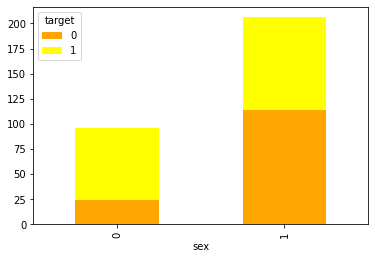

In [36]:
# Stacked plot for Distribution of heart disease/No heart disease by gender
tab1.plot(kind='bar', stacked='True',  color=['orange','yellow'],grid=False)

Describe the relationship between cholesterol levels and our target variable.

<AxesSubplot:xlabel='sex', ylabel='chol'>

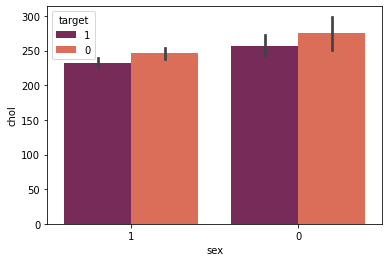

In [37]:
sns.barplot(data=df_heart, x='sex', y='chol', hue='target', palette='rocket')

What can be concluded about the relationship between peak exercising and occurrence of heart attack?

In [38]:
# Distribution of heart disease/No heart disease by exang(Exercise induced angina :1 = yes, 0 = no)
tab3 =pd.crosstab(df_heart['exang'],df_heart['target'])
tab3
# 23 cases of Heart Disease induced by angina(exang)

target,0,1
exang,,
0,62,141
1,76,23


In [39]:
# Distribution of heart disease/No heart disease by slope(Peak exercise ST segment)
tab4 =pd.crosstab(df_heart['slope'],df_heart['target'])
tab4
# 44 cases heart diseases of flat, Peak exercise ST segment
# 106 cases heart diseases of downsloping, Peak exercise ST segment

target,0,1
slope,,
0,12,9
1,91,49
2,35,106


In [40]:
# Distribution of heart disease/No heart disease by oldpeak(displays the value which is an integer or float.)
tab5 =pd.crosstab(df_heart['oldpeak'],df_heart['target'])
tab5

target,0,1
oldpeak,,
0.0,25,73
0.1,3,4
0.2,3,9
0.3,1,2
0.4,1,8
0.5,1,4
0.6,4,10
0.7,0,1
0.8,6,7


Is thalassemia a major cause of CVD? How are the other factors determining the occurrence of CVD?

In [41]:
# Distribution of heart disease/No heart disease by thal(Peak exercise ST segment)
tab6 =pd.crosstab(df_heart['thal'],df_heart['target'])
tab6
# 129 cases of heart diseases of fixed defect 
# 28 cases of heart diseases of reversible defect

target,0,1
thal,,
0,1,1
1,12,6
2,36,129
3,89,28


In [42]:
# Distribution of heart disease/No heart disease by ca
tab7 =pd.crosstab(df_heart['ca'],df_heart['target'])
tab7 

target,0,1
ca,,
0,45,130
1,44,21
2,31,7
3,17,3
4,1,3


In [43]:
# Distribution of heart disease/No heart disease by fbs
tab8 =pd.crosstab(df_heart['fbs'],df_heart['target'])
tab8 

target,0,1
fbs,,
0,116,141
1,22,23


In [44]:
# Distribution of heart disease/No heart disease by restecg
tab9 =pd.crosstab(df_heart['restecg'],df_heart['target'])
tab9 

target,0,1
restecg,,
0,79,68
1,56,95
2,3,1


In [45]:
# Distribution of heart disease/No heart disease by thalach
tab10 =pd.crosstab(df_heart['thalach'],df_heart['target'])
tab10 

target,0,1
thalach,,
71,1,0
88,1,0
90,1,0
95,1,0
96,1,1
...,...,...
190,0,1
192,0,1
194,0,1


In [46]:
# Distribution of heart disease/No heart disease by cp
tab11 =pd.crosstab(df_heart['cp'],df_heart['target'])
tab11 

target,0,1
cp,,
0,104,39
1,9,41
2,18,68
3,7,16


<AxesSubplot:>

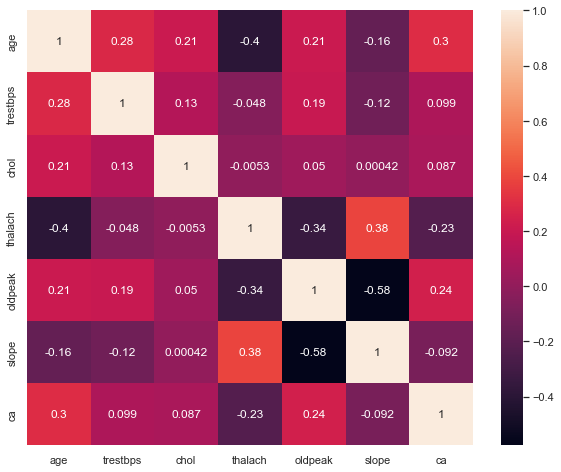

In [47]:
## Plotting heatmap to 
sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(df_heart.corr(),annot=True)

Use a pair plot to understand the relationship between all the given variables.

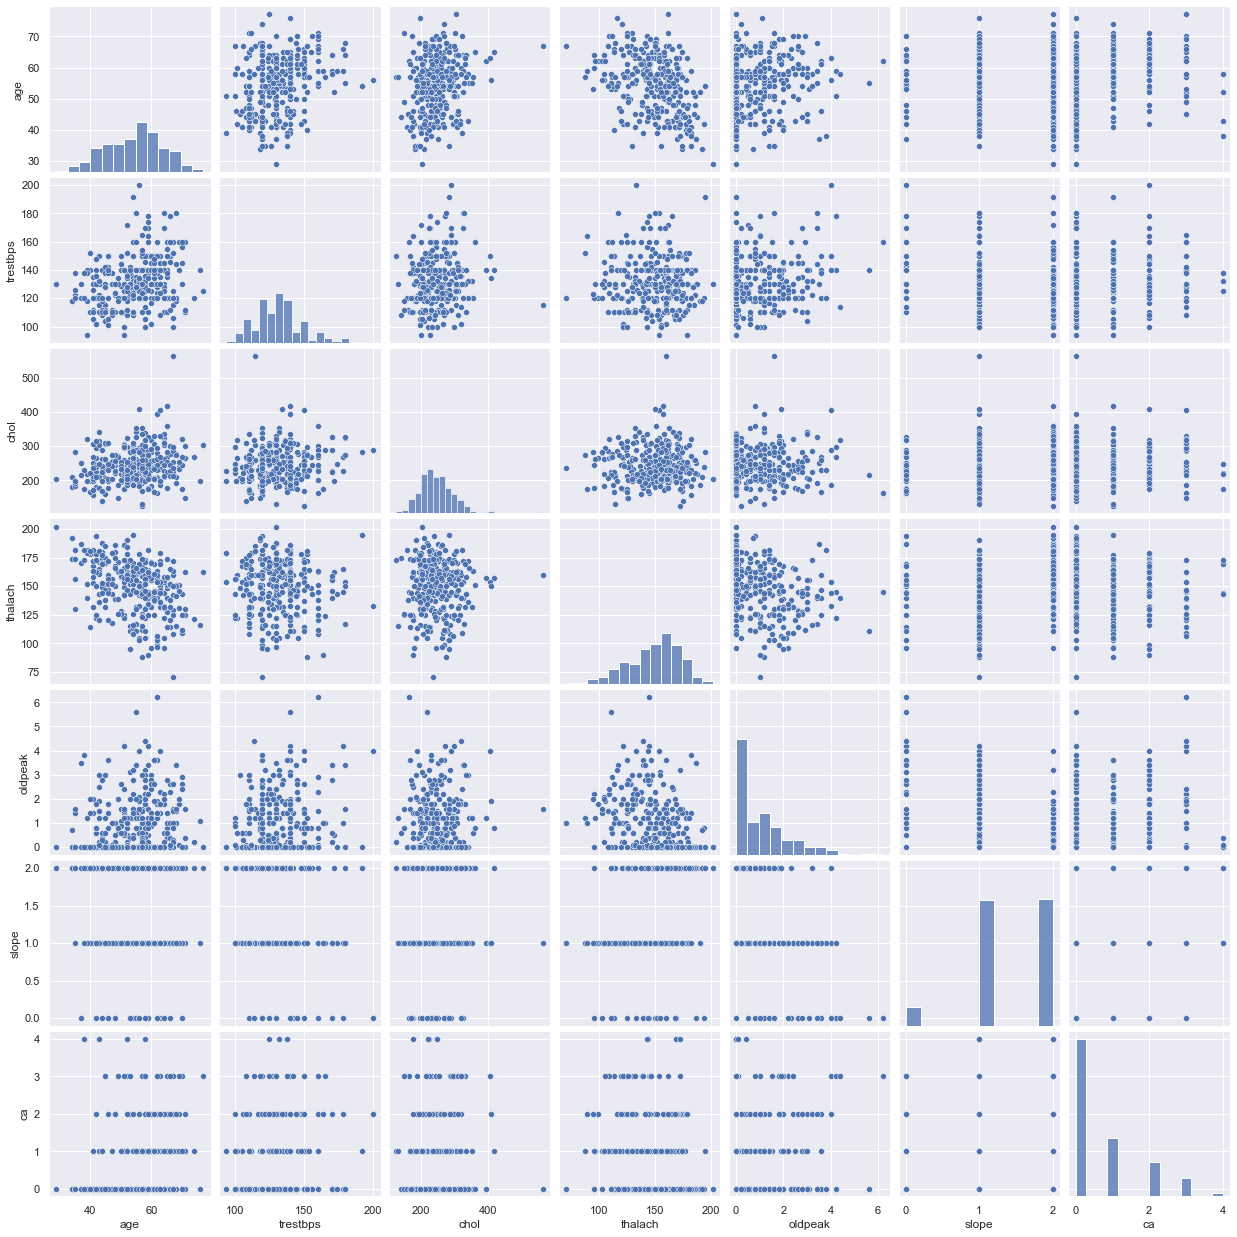

In [48]:
## Plotting pair plot to visualize graphically
sns.pairplot(df_heart)

Perform logistic regression, predict the outcome for test data, and validate the results by using the confusion matrix.

In [49]:
from sklearn.impute import SimpleImputer

In [50]:
# Segretating X and y values
X = df_heart.iloc[:, :-1].values
Y = df_heart.iloc[:, 13].values

In [51]:
# Standardization of Data
scale = StandardScaler()

In [52]:
# Training the data
X = scale.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [53]:
# logistic_model is name of object
logistic_model = LogisticRegression()

In [54]:
# Fitting of train
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [55]:
## printing coefficient of model
print(logistic_model.coef_)

[[-0.16186905 -0.64177319  0.98651948 -0.17311117 -0.00625313  0.15570226
   0.24102167  0.08948139 -0.46814646 -0.74259952  0.27365405 -0.5988354
  -0.53422449]]


In [56]:
## printing intercept of model
print(logistic_model.intercept_)

[0.24368175]


In [57]:
## Printing Training Score
print('The Training Score is:',logistic_model.score(X_train,y_train))

The Training Score is: 0.8436018957345972


In [58]:
## Printing Test Score
print('The Test Score is:',logistic_model.score(X_test,y_test))

The Test Score is: 0.8681318681318682


In [59]:
# Predicted values
logistic_predictions = logistic_model.predict(X_test)
logistic_predictions

array(['1', '1', '1', '1', '0', '1', '1', '0', '0', '1', '0', '1', '1',
       '0', '1', '1', '1', '1', '1', '0', '0', '0', '1', '0', '0', '1',
       '0', '1', '0', '1', '0', '1', '1', '0', '1', '1', '1', '1', '1',
       '1', '0', '1', '1', '1', '0', '1', '0', '1', '1', '0', '0', '0',
       '0', '0', '1', '0', '0', '1', '1', '0', '1', '1', '0', '1', '0',
       '0', '1', '1', '1', '1', '1', '0', '1', '0', '1', '0', '0', '1',
       '1', '1', '1', '1', '0', '0', '0', '1', '0', '1', '0', '0', '0'],
      dtype=object)

In [60]:
# Confusion Matrix
conf_matrix=confusion_matrix(y_test, logistic_predictions)

In [61]:
print("The confusion matrix is :'\n")
print(confusion_matrix(y_test, logistic_predictions))

The confusion matrix is :'

[[35  8]
 [ 4 44]]


In [62]:
## Computing True positive
True_positive=conf_matrix[0][0]
True_positive

35

In [63]:
## Computing False positive
False_positive =conf_matrix[0][1]
False_positive

8

In [64]:
## Computing False negative
False_negative =conf_matrix[1][0]
False_negative

4

In [65]:
## Computing True Negative
True_negative=conf_matrix[1][1]
True_negative

44

In [66]:
## Computing Precision
Precision= True_positive/(True_positive+False_positive)
Precision

0.813953488372093

In [67]:
## Computing Recall
Recall= True_positive/(True_positive+False_negative)
Recall

0.8974358974358975

In [68]:
## Computing F1 Score
f1_Score=2*(Precision*Recall)/(Recall+Precision)

In [69]:
## Printing Classification Report
Classification_Report= classification_report(y_test,logistic_predictions)
print(Classification_Report)

              precision    recall  f1-score   support

           0       0.90      0.81      0.85        43
           1       0.85      0.92      0.88        48

    accuracy                           0.87        91
   macro avg       0.87      0.87      0.87        91
weighted avg       0.87      0.87      0.87        91



In [70]:
print('Accuracy of logistic regression classifier {}'.format(logistic_model.score(X_test, y_test)))

Accuracy of logistic regression classifier 0.8681318681318682


# Result:
The model correctly classifys patients with the risk of having a heart attack 87% accuracy.


# Concerns:
Even though the logistic model was able to classify with 87% accuracy the amount of miscalculatoin is concerning especially in regards to the type 2 errors.

# Model Performance Summary
The logistic regression model has accuracy with 87 percent to predict the examining Factors Responsible for Heart Attacks. 
